In [260]:
import random

class sentiment():
    POSITIVE = 'POSITIVE'
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'


class Review() :
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return sentiment.NEGATIVE
        elif self.score == 3:
            return sentiment.NEUTRAL
        else :
            return sentiment.POSITIVE
            
class ReviewContainer():
    def __init__(self, reviews):
        self.reviews = reviews
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[: len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
#         print(negative[0].text)
#         print(len(negative))
#         print(len(positive))

In [232]:
import json

reviews = []
filename = './Books_small_10000.json'
with open(filename ) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [233]:
reviews[5].text

'I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia\'s trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character\'s voice on a strong subject and making it so that other peoples story may be heard through Mia\'s.'

In [234]:
reviews[5].score

5.0

In [235]:
reviews[789].sentiment

'POSITIVE'

In [236]:
len(reviews)

10000

In [262]:
from sklearn.model_selection import train_test_split
training, test  = train_test_split(reviews, test_size = 0.33, random_state = 42)

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
len(train_container.reviews)

872

In [238]:
print(len(training))
print(len(test))

6700
3300


In [239]:
# independent variable  = text
# dependent variable = sentiment
train_x = [x.text for x in training]
train_y = [y.sentiment for y in training]

test_x = [x.text for x in test]
test_y = [y.sentiment for y in test]

In [240]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

train_x_vector = vectorizer.fit_transform(train_x)

test_x_vector = vectorizer.transform(test_x)
# for further explanation
# visit  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [241]:
print(train_x_vector)

  (0, 15782)	1
  (0, 3505)	1
  (0, 6793)	1
  (0, 1295)	1
  (0, 8494)	1
  (0, 12951)	1
  (0, 16595)	3
  (0, 5766)	1
  (0, 26288)	1
  (0, 12435)	1
  (0, 4271)	1
  (0, 23767)	3
  (0, 22704)	1
  (0, 12649)	2
  (0, 25886)	1
  (0, 24137)	1
  (0, 26171)	1
  (0, 19208)	1
  (0, 8042)	1
  (0, 8322)	1
  (0, 5317)	1
  (0, 23881)	1
  (0, 9223)	1
  (0, 3137)	1
  (0, 24477)	1
  :	:
  (6699, 23758)	1
  (6699, 12690)	1
  (6699, 21484)	1
  (6699, 25209)	1
  (6699, 19289)	1
  (6699, 16774)	1
  (6699, 13993)	1
  (6699, 23825)	1
  (6699, 25410)	1
  (6699, 1662)	1
  (6699, 26222)	1
  (6699, 11869)	1
  (6699, 8934)	1
  (6699, 9599)	1
  (6699, 10251)	1
  (6699, 14275)	1
  (6699, 7635)	1
  (6699, 19259)	1
  (6699, 15018)	1
  (6699, 19258)	1
  (6699, 20037)	1
  (6699, 6439)	1
  (6699, 6988)	1
  (6699, 9231)	1
  (6699, 4100)	1


In [242]:
print(train_y)

['POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE'

In [243]:
print(test_x_vector)

  (0, 683)	1
  (0, 1295)	2
  (0, 1326)	5
  (0, 1562)	1
  (0, 1624)	1
  (0, 2011)	1
  (0, 2210)	1
  (0, 2543)	2
  (0, 2922)	1
  (0, 3137)	4
  (0, 3161)	1
  (0, 3218)	2
  (0, 3643)	1
  (0, 3655)	1
  (0, 3677)	1
  (0, 3706)	1
  (0, 4520)	1
  (0, 4930)	1
  (0, 5962)	1
  (0, 6910)	1
  (0, 6911)	1
  (0, 7184)	1
  (0, 7185)	2
  (0, 7790)	1
  (0, 7952)	1
  :	:
  (3299, 22704)	4
  (3299, 23628)	1
  (3299, 23748)	2
  (3299, 23758)	4
  (3299, 23767)	12
  (3299, 23785)	1
  (3299, 23825)	2
  (3299, 23843)	1
  (3299, 23881)	2
  (3299, 23951)	1
  (3299, 24107)	6
  (3299, 25011)	1
  (3299, 25134)	1
  (3299, 25215)	2
  (3299, 25742)	2
  (3299, 25904)	1
  (3299, 25946)	1
  (3299, 25949)	1
  (3299, 25961)	1
  (3299, 26005)	1
  (3299, 26076)	1
  (3299, 26171)	1
  (3299, 26288)	1
  (3299, 26365)	1
  (3299, 26370)	1


In [244]:
print(train_y)

['POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE'

### Support vector machine

In [245]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear')
clf_svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [246]:
clf_svc.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### decision tree 


In [247]:
#
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [248]:
clf_dtc.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### naive bayes 

In [249]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [250]:
clf_gnb.predict(test_x_vector[0].toarray())

array(['POSITIVE'], dtype='<U8')

### logistic regression 

In [251]:
from sklearn.linear_model import LogisticRegression
clf_lgr = LogisticRegression()
clf_lgr.fit(train_x_vector , train_y)

C:\Users\Bharati\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [252]:
clf_lgr.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### Evaluation

## mean accuracy 

In [253]:
#svm
m1 = clf_svc.score(test_x_vector, test_y)
print(m1)

0.8124242424242424


In [254]:
#decision tree classifier
m2 = clf_dtc.score(test_x_vector, test_y)
print(m2)

0.7751515151515151


In [255]:
# naive bayes 
m3 = clf_gnb.score(test_x_vector.toarray(), test_y)
print(m3)

0.6587878787878788


In [256]:
# logistic regression
m4 = clf_lgr.score(test_x_vector, test_y)
print(m4)

0.8409090909090909


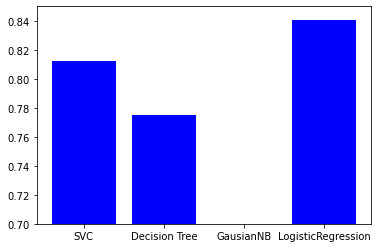

In [257]:
y = [m1, m2,m3,m4]
x = ['SVC', "Decision Tree", 'GausianNB','LogisticRegression']

import matplotlib.pyplot as plt
plt.ylim(0.70, 0.85)
plt.bar(x,y, color = 'blue')
plt.show()



##  F1 score

In [258]:
# f1 score of each model
from sklearn.metrics import f1_score
svm_f1 = f1_score(test_y, clf_svc.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
dtc_f1 = f1_score(test_y, clf_dtc.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
gnb_f1 = f1_score(test_y, clf_gnb.predict(test_x_vector.toarray()), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
lgr_f1 = f1_score(test_y, clf_lgr.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])

print(svm_f1, dtc_f1, gnb_f1,lgr_f1, sep='\n')

[0.90738061 0.40268456 0.2656    ]
[0.87628501 0.19371728 0.17013889]
[0.7996939  0.11851852 0.1260745 ]
[0.92139968 0.40983607 0.29250457]


In [259]:
train_y.count(sentiment.POSITIVE)

5611